In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
import torch
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import torch
from torch.utils.data import Dataset
from PIL import Image

from torch import nn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/DatasetA_softcomputing2/training-a.csv', low_memory=False)
df.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
col = list(df.columns)

In [ ]:
drop_col = []
for i in col:
  if i!= 'filename' and i!= 'digit':
    drop_col.append(i)

print(drop_col)

['original filename', 'scanid', 'database name original', 'contributing team', 'database name']


In [ ]:
df = df.drop(columns=drop_col)
df

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
...,...,...
19697,a19697.png,4
19698,a19698.png,3
19699,a19699.png,8
19700,a19700.png,3


In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 40000
input_dim = 180*180
num_hidden = 200  
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
mean = [0.5,]
std = [0.5, ]

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(180),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
Path = '/content/drive/MyDrive/Colab Notebooks/Soft Computing/DatasetA_softcomputing2/training-a'

In [ ]:
train_data  = Dataset(df, Path, train_transform)
test_data = Dataset(df, Path, test_transform)

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
print(num_epochs)

203


In [ ]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)        
        self.relu_1 = nn.ReLU()
         
        self.linear_2 = nn.Linear(num_hidden, num_hidden)    
        self.relu_2 = nn.ReLU()
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)   
        self.relu_3 = nn.ReLU()
  
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
    
        self.linear_5= nn.Linear(num_hidden, num_hidden) 
        self.relu_5= nn.ReLU()

        self.linear_6 = nn.Linear(num_hidden, num_hidden) 
        self.relu_6 = nn.ReLU()
  
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        # 1st  layer
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

NeuralNetworkModel(
  (linear_1): Linear(in_features=16384, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3032267093658447. Accuracy: 10.029438635671506
Iteration: 1000. Loss: 2.3033571243286133. Accuracy: 10.029438635671506
Iteration: 1500. Loss: 2.3020739555358887. Accuracy: 10.029438635671506
Iteration: 2000. Loss: 2.299471139907837. Accuracy: 10.039589889351335
Iteration: 2500. Loss: 2.300816297531128. Accuracy: 10.877068317937265
Iteration: 3000. Loss: 2.3017690181732178. Accuracy: 15.556796264338645
Iteration: 3500. Loss: 2.300701379776001. Accuracy: 17.861130849659933
Iteration: 4000. Loss: 2.2983973026275635. Accuracy: 19.393970155314182
Iteration: 4500. Loss: 2.2965807914733887. Accuracy: 27.43376306973911
Iteration: 5000. Loss: 2.292062282562256. Accuracy: 25.880621256725206
Iteration: 5500. Loss: 2.2828269004821777. Accuracy: 17.50076134402599
Iteration: 6000. Loss: 2.2184038162231445. Accuracy: 17.505836970865904
Iteration: 6500. Loss: 2.287060499191284. Accuracy: 10.059892396710994
Iteration: 7000. Loss: 2.290260076522827. Accuracy: 13.729570601969343
I

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/128x128_exp2.csv', names=["Iteration", "Loss", "Accuracy"], low_memory=False)
df2.head()

,Iteration,Loss,Accuracy
0,500,2.3032267093658447.,10.029439
1,1000,2.3033571243286133.,10.029439
2,1500,2.3020739555358887.,10.029439
3,2000,2.299471139907837.,10.039590
4,2500,2.300816297531128.,10.877068


In [ ]:
Iteration = df2['Iteration'].tolist()
Loss = [2.3032267093658447, 2.3033571243286133, 2.3020739555358887, 2.299471139907837, 2.300816297531128, 2.3017690181732178, 
        2.300701379776001, 2.2983973026275635, 2.2965807914733887, 2.292062282562256, 2.2828269004821777, 2.2184038162231445, 
        2.287060499191284, 2.290260076522827, 2.2881336212158203,2.2775800228118896, 2.2070538997650146, 2.1556174755096436, 
        2.2420408725738525, 2.1861214637756348, 2.186673402786255, 2.003229856491089, 2.2986865043640137, 2.4415981769561768, 
        2.1432337760925293, 1.6968252658843994, 1.633525848388671, 1.6793502569198608, 1.5562268495559692, 1.4344676733016968,
        1.527978777885437, 1.6734241247177124, 2.009504556655884, 1.7484298944473267, 1.9665589332580566, 1.3102357387542725, 
        1.5764400959014893, 1.0923367738723755, 1.3481361865997314, 1.9715076684951782, 0.9342482686042786, 1.03824782371521, 
        1.2009854316711426, 1.2500284910202026, 1.5364274978637695, 2.4035956859588623, 1.0595602989196777, 0.8999078869819641,
        0.7590873837471008, 1.3210439682006836, 1.113372564315796, 0.7500030398368835, 0.8533841967582703, 0.5390610694885254, 
        0.8339517116546631, 0.7537348866462708, 1.7128262519836426, 0.6683085560798645, 0.7079898118972778, 1.1630417108535767,
        1.8516104221343994, 0.660278856754303, 0.5793845057487488, 0.6175408363342285, 0.436033695936203, 1.511048436164856, 
        0.6099424958229065, 0.5626718401908875, 0.4239150285720825, 0.5379927158355713, 1.0381673574447632, 0.5152651071548462, 0.5055557489395142, 
        0.44249239563941956, 0.4519573450088501, 0.5953980088233948,0.4850273132324219, 0.21523135900497437, 1.1711782217025757]
Accuracy = df2['Accuracy'].tolist()

In [ ]:
print(Iteration)
print(Loss)
print(Accuracy)

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500]
[2.3032267093658447, 2.3033571243286133, 2.3020739555358887, 2.299471139907837, 2.300816297531128, 2.3017690181732178, 2.300701379776001, 2.2983973026275635, 2.2965807914733887, 2.292062282562256, 2.2828269004821777, 2.2184038162231445, 2.287060499191284, 2.290260076522827, 2.2881336212158203, 2.2775800228118896, 2.2070538997650146, 2.1556174755096436, 2.2420408725738525, 2.1861214637756348, 2.186673402786255, 2.003229856491089, 2.2986865043640137, 2.44159817695

In [ ]:
print(min(Loss))
print(max(Accuracy))
print(max(Loss))
print(min(Accuracy))

0.21523135900497437
89.48330119
2.4415981769561768
10.02943864


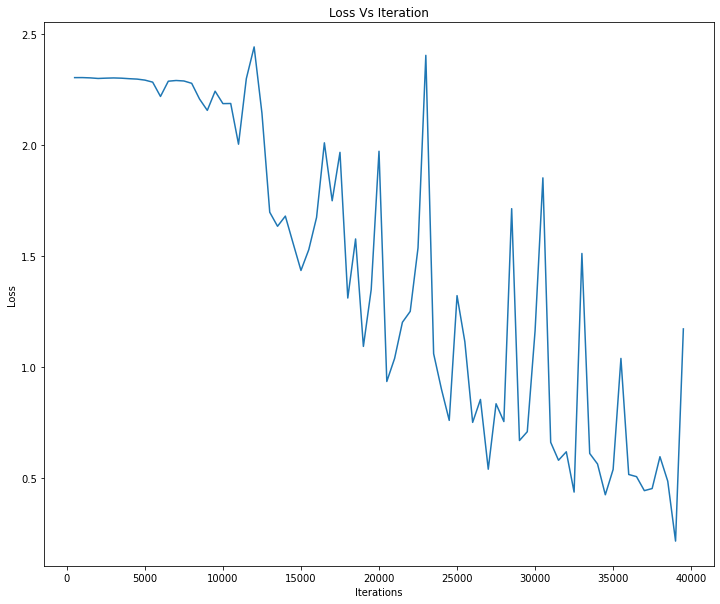

In [ ]:
x= np.array(Iteration)
y= np.array(Loss)
plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.title("Loss Vs Iteration")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

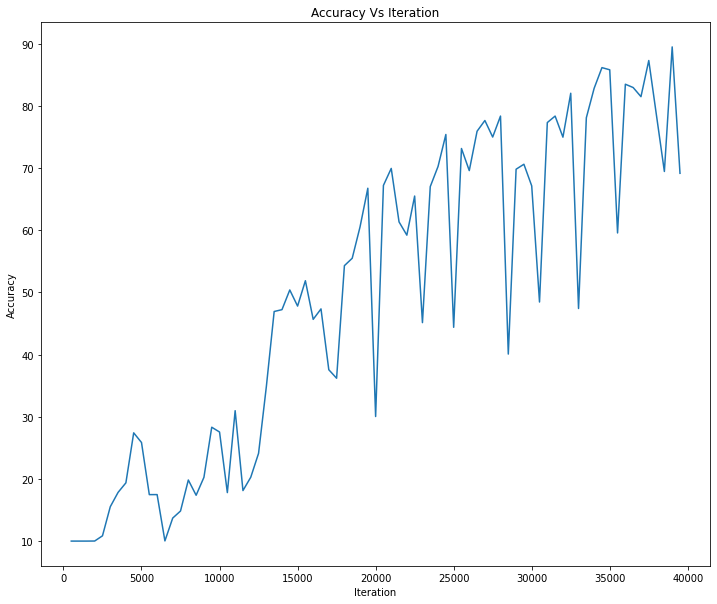

In [ ]:
y= np.array(Accuracy)
x= np.array(Iteration)
plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.title("Accuracy Vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()